## Imports

In [1]:
import numpy as np
import pandas as pd

from autorank import autorank
from autorank import plot_stats
from autorank import create_report
from autorank import latex_table

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# filtering messages to error
import warnings

warnings.filterwarnings('ignore')

## Utils

In [3]:
def read_file(filename):
    tmp = list()
    with open(filename) as f:
        for line in f:
            if len(line.rstrip()) == 0:
                continue
            tmp.append([float(i) for i in line.rstrip().split(',')])
    return tmp

## Loading Results

In [4]:
ACTIVE_SUPER = 0

RF = 0
GB = 1
LR = 2
SVC = 3
MLP = 4

In [5]:
file = 'active-super'
results_path = '../../results/compiled'

In [6]:
# initializing lists
accs = list()

# reading results from file
base_url = f'{results_path}/{file}'
accs.append(read_file(f'{base_url}-accs-mean.txt'))

## Statistical Tests

In [7]:
learners = [RF, GB, LR, SVC, MLP]
learner_names = ['RF', 'GB', 'LR', 'SVC', 'MLP']

learners.reverse()
learner_names.reverse()

data = pd.DataFrame()

for learner, name in zip(learners, learner_names):
    data[name] = accs[ACTIVE_SUPER][learner]

In [8]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
     meanrank    median       mad ci_lower ci_upper effect_size   magnitude
MLP      4.79  0.566125     0.029   0.5515  0.60175         0.0  negligible
LR       3.63  0.618125  0.027875  0.60125  0.64325   -1.233113       large
SVC      3.56  0.645625  0.052875   0.5925   0.6865   -1.257478       large
RF       1.98  0.673375    0.0415    0.643  0.70625   -2.020658       large
GB       1.04  0.707250  0.023875  0.68175   0.7225   -3.583679       large
pvalue=6.942399420017882e-75
cd=0.6099436402016305
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[8.451342728221789e-05, 7.862536222091876e-06, 2.0529739686026005e-06, 2.583137757028453e-05, 3.248805668931709e-08]
homoscedastic=False
pval_homogeneity=6.966749195157587e-14
homogeneity_test=levene
alpha=0.05
alpha_normality=0.01
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effect_size=akinshin_gamma)


In [9]:
create_report(result)

The statistical analysis was conducted for 5 populations with 100 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations MLP (p=0.000), LR (p=0.000), SVC (p=0.000), RF (p=0.000), and GB (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=0.610 of the Nemenyi test.
We reject the null hypothesis (p

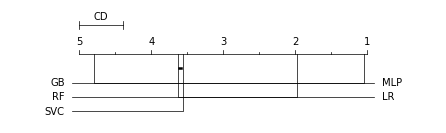

In [10]:
plot_stats(result)
plt.show()

## Creating file to [cd-diagram](https://github.com/hfawaz/cd-diagram) lib analysis

In [11]:
classifier_name = list()
dataset_name = list()
accuracy = list()

for learner, name in zip(learners, learner_names):
    for index, acc in enumerate(accs[ACTIVE_SUPER][learner]):
        classifier_name.append(name)
        dataset_name.append(f'dataset{index}')
        accuracy.append(acc)
        
data = pd.DataFrame({
    'classifier_name': classifier_name,
    'dataset_name': dataset_name,
    'accuracy': accuracy
})

In [12]:
data.to_csv('example_super.csv', index=False)